In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import acquire as a
import prepare as p
import explore as e


In [4]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
LANGUAGES = ['Javascript','Python','Go','Typescript','Java']

In [5]:
reload(p)
readmes = a.acquire_readmes()
readmes.readme_contents = readmes.readme_contents.astype('str')
readmes = p.prep_df_for_nlp(readmes,'readme_contents',extra_words=["'","use"],exclude_words=[])
train, validate, test = p.split_data(readmes,'language')

In [6]:
train[train.username == 'facebook']

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
515,hhvm,Other,# HHVM\n\n[HHVM page](https://hhvm.com) |\n[HH...,hhvm hhvm pagehttpshhvmcom hhvm documentationh...,hhvm hhvm pagehttpshhvmcom hhvm documentationh...,hhvm hhvm pagehttpshhvmcom hhvm documentationh...,facebook,2069
831,watchman,Other,"<div align=""center"">\n <img src=""website/stati...",div aligncenter srcwebsitestaticlogopng width2...,div aligncent srcwebsitestaticlogopng width20 ...,div aligncenter srcwebsitestaticlogopng width2...,facebook,907
28,jest,TypeScript,"<p align=""center"">\n <a href=""https://badge.f...",p aligncenter hrefhttpsbadgefuryiojsjest srcht...,p aligncent hrefhttpsbadgefuryiojsjest srchttp...,p aligncenter hrefhttpsbadgefuryiojsjest srcht...,facebook,8658


In [7]:
reload(e)
e.top_five_words(train.lemmatized)


,word_1,count_1,word_2,count_2,word_3,count_3,word_4,count_4,word_5,count_5
503,x,48,daisyui,16,tailwind,11,br,6,tailwindcss,6
496,width100px,51,altbr,51,aligncentera,51,titlecodeatd,42,tr,22
296,clickhouse,14,release,3,highlight,3,office,3,cheq,3
102,model,32,python,30,deepnlp,19,tensorflow,15,po,15
605,dotenv,28,value,22,file,22,variable,20,environment,19
...,...,...,...,...,...,...,...,...,...,...
92,1000,5,word,4,text,3,like,3,write,3
22,algorithm,5,code,3,github,3,visualization,3,contributing,3
110,nested,3,httpsuprbcomappsnestedhttpsuprbcomappsnested,1,right,1,gridaliciousmasonry,1,left,1
660,document,6,code,4,google,3,practice,3,change,3


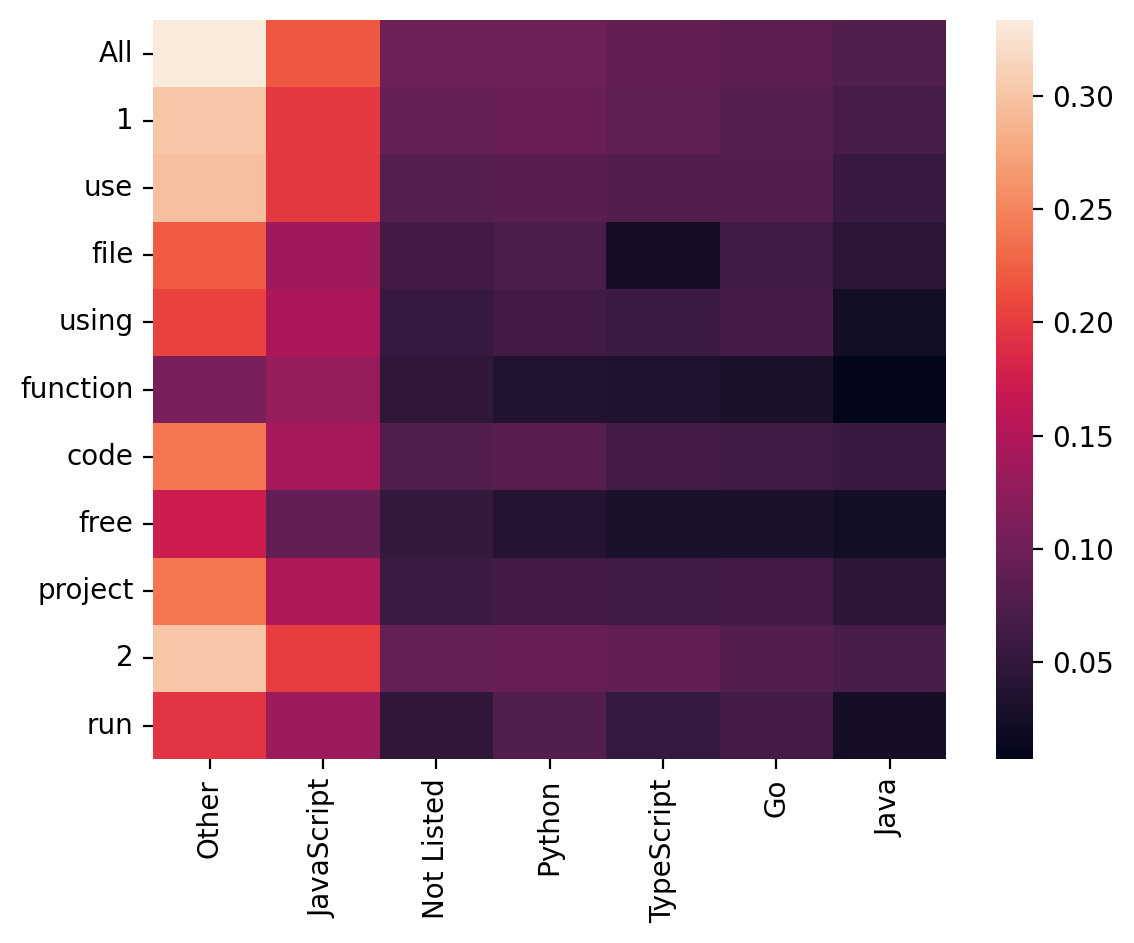

In [45]:
reload(e)
e.word_heat_map(train)

language
Go             47
Java           42
JavaScript    121
Not Listed     54
Other         184
Python         54
TypeScript     50
Name: lemmatized, dtype: int64